<a href="https://colab.research.google.com/github/Kei-Kobayash/practice_machine_learning/blob/main/ml_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Survived.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# => 不均衡データ。重要な観点。
### 例えば、仮に生存率が5%とする。そうすると、「0歳以上」という基準で分類しても、正解率が95%になってしまう

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 11)

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
print(df["Embarked"].mode())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])
df.isnull().any(axis=0)

0    S
Name: Embarked, dtype: object


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [19]:
feature = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

x = df[feature]
t = df["Survived"]

from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

x_train.shape

(712, 5)

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = "balanced")

model.fit(x_train, t_train)
model.score(x_test, t_test)

0.7374301675977654

# Tuning

In [25]:
df2 = pd.read_csv("Survived.csv")
pd.pivot_table(df2, index = "Survived", columns = "Pclass", values = "Age")

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


## ここ途中↓

In [30]:
is_null = df2["Age"].isnull()

for survived in [0, 1]:
  for pclass in [1, 2, 3]:
    df2.loc[(df2["Pclass"] == pclass) & (df2["Survived"] == survived) & (is_null), "Age" == age]


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool


'\nfor survived = [0, 1]:\n  for \n'

<ipython-input-40-24b523b2cbec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex = df2.groupby("Sex").mean()


Text(0.5, 1.0, 'Survival rate')

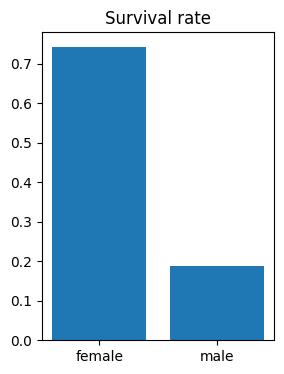

In [40]:
sex = df2.groupby("Sex").mean()
sex

fig, ax = plt.subplots(figsize = (3, 4))
ax.bar(["female", "male"], sex["Survived"])
ax.set_title("Survival rate")